<a href="https://colab.research.google.com/github/Pludaggerto/learning/blob/main/code/demoTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 张量
张量的使用和Numpy中的ndarrays很类似, 区别在于张量可以在GPU或其它专用硬件上运行, 这样可以得到更快的加速效果。

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

张量的拼接


In [ ]:
tensor = torch.ones(4, 4)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


# 2 自动求导
## 2.1 背景
torch.autograd是 PyTorch 的自动差分引擎，可为神经网络训练提供支持。 在本节中，您将获得有关 Autograd 如何帮助神经网络训练的概念性理解。

In [ ]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

我们通过模型的每一层运行输入数据以进行预测。 这是正向传播。

In [ ]:
prediction = model(data)
prediction.shape

torch.Size([1, 1000])

我们使用模型的预测和相应的标签来计算误差（loss）。 下一步是通过网络反向传播此误差。 当我们在误差张量上调用.backward()时，开始反向传播。 然后，Autograd 会为每个模型参数计算梯度并将其存储在参数的.grad属性中。

In [ ]:
loss = (prediction - labels).sum()
loss.backward() 
loss

tensor(-509.6292, grad_fn=<SumBackward0>)

最后，我们调用.step()启动梯度下降。 优化器通过.grad中存储的梯度来调整每个参数。

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optim.step()


# 2.2 Autograd的微分
让我们来看看autograd如何收集梯度。 我们用`requires_grad=True`创建两个张量`a`和`b`。 这向autograd发出信号，应跟踪对它们的所有操作。

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


# 3 神经网络

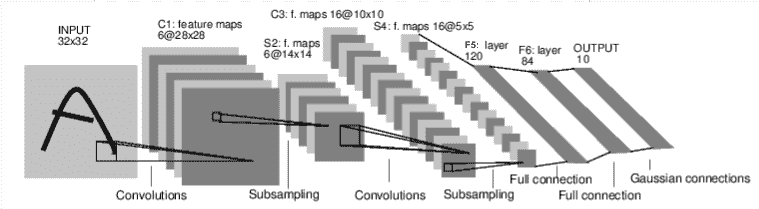